In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('사고유형별_교통사고.csv', encoding='cp949')
df.head()

,사고유형별(1),사고유형별(2),월별(1),2021,2021.1,2021.2
0,사고유형별(1),사고유형별(2),월별(1),사고건수 (건),사망자수 (명),부상자수 (명)
1,차대사람,횡단중,전체,12767,445,13121
2,차대사람,횡단중,1월,1017,33,1036
3,차대사람,횡단중,2월,945,27,980
4,차대사람,횡단중,3월,1060,36,1074


In [2]:
df.drop(index = 0, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 1 to 171
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사고유형별(1)  171 non-null    object
 1   사고유형별(2)  171 non-null    object
 2   월별(1)     171 non-null    object
 3   2021      171 non-null    object
 4   2021.1    171 non-null    object
 5   2021.2    171 non-null    object
dtypes: object(6)
memory usage: 8.1+ KB


In [4]:
df = df[df['월별(1)']=='전체']
df

,사고유형별(1),사고유형별(2),월별(1),2021,2021.1,2021.2
1,차대사람,횡단중,전체,12767,445,13121
14,차대사람,차도통행중,전체,3628,146,3628
27,차대사람,길가장자리구역통행중,전체,1973,33,2014
40,차대사람,보도통행중,전체,2226,21,2331
53,차대사람,기타/불명,전체,14675,333,15088
66,차대차,충돌,전체,83093,611,125806
79,차대차,추돌,전체,32717,379,57423
92,차대차,기타/불명,전체,44222,248,63445
105,차량단독,전도/전복,전체,1121,118,1191
118,차량단독,충돌,전체,2765,343,3313


In [5]:
df_group = df.groupby(['사고유형별(1)','사고유형별(2)']).sum()
df_group

월별(1)   2021 2021.1  2021.2
사고유형별(1) 사고유형별(2)                              
차대사람     기타/불명         전체  14675    333   15088
         길가장자리구역통행중    전체   1973     33    2014
         보도통행중         전체   2226     21    2331
         차도통행중         전체   3628    146    3628
         횡단중           전체  12767    445   13121
차대차      기타/불명         전체  44222    248   63445
         추돌            전체  32717    379   57423
         충돌            전체  83093    611  125806
차량단독     기타/불명         전체   3401    148    3639
         기타이탈          전체    156     18     186
         전도/전복         전체   1121    118    1191
         추락            전체    385     73     422
         충돌            전체   2765    343    3313
철길건널목    철길건널목         전체      1      0       1

In [6]:
df_group.drop(['월별(1)'], axis = 1, inplace=True)

In [7]:
df_group.rename(columns = {'2021':'사고건수(건)','2021.1':'사망자수(명)','2021.2':'부상자수(명)'}, inplace = True)
df_car_person = df_group.loc['차대사람',:].reset_index().rename(columns = {'사고유형별(2)':'사고유형별'})

In [8]:
df_car_person

,사고유형별,사고건수(건),사망자수(명),부상자수(명)
0,기타/불명,14675,333,15088
1,길가장자리구역통행중,1973,33,2014
2,보도통행중,2226,21,2331
3,차도통행중,3628,146,3628
4,횡단중,12767,445,13121


In [9]:
df_car_person['사고건수(건)'] = df_car_person['사고건수(건)'].astype('int64')
df_car_person['사망자수(명)'] = df_car_person['사망자수(명)'].astype('int64')
df_car_person['부상자수(명)'] = df_car_person['부상자수(명)'].astype('int64')

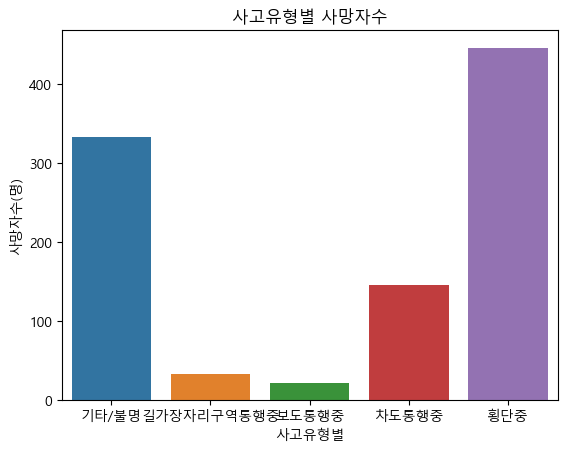

In [10]:
plt.rc('font', family = 'Malgun Gothic')
sns.barplot(data = df_car_person, x = '사고유형별', y = '사망자수(명)')
plt.title('사고유형별 사망자수')
plt.show()

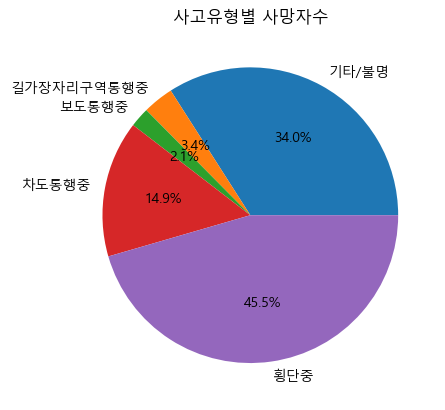

In [11]:
plt.pie(df_car_person['사망자수(명)'], labels = df_car_person['사고유형별'], autopct='%.1f%%')
plt.title('사고유형별 사망자수')
plt.show()